# New Zealand Content

Topic models are well established methods for unsupervised derivation of clusters of similar documents within a corpus. One way to look for specifically New Zealand content in a corpus would be to run an appropraite topic model on the NB2 corpus, look for appropriate clusters of keywords, and examine the articles the are high in the relevant topics.

In [2]:
import pickle

from gensim.matutils import corpus2csc
from gensim.models import LdaMulticore
from gensim import corpora

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import pandas as pd

import wordcloud

import NL_helpers
import NL_topicmodels

## Loading pre-trained model

Earlier in the project, I trained 10, 50, 100, and 500 topic models on the NB2 corpus. Of these, the 100 topic model seemed to produce the most meaningful collections of keyworkds. Two topics stuck out for further examination in the 100 topic model. These are (with their top 10 keywords):
* Topic 93: schools, education, children, state, system, religious, bible, school, secular, religion; and
* Topic 90: hipi, toa, tohunga, awa, hymns, pole, ahi, ain't, loafer, like.

Topic 93 suggests material about the appropriate nature of the growing NZ education system, while Topic 90's use of te reo is of interest, especially if it aligns with material in English which could otherwise be recognised as philosophical.

In [3]:
model = LdaMulticore.load('lda_models/nb2_v2_philoso_100.ldamodel')
phil_df = pd.read_pickle('pickles/nb2_v2_philoso_df.tar.gz')
dictionary = corpora.Dictionary.load('dictionaries/nb2_v2_philoso.dict')

In [4]:
phil_df['Tokenised'] = phil_df['Text'].apply(NL_helpers.tokenise_and_stop)

In [7]:
phil_corpus = NL_topicmodels.NL_corpus(phil_df, dictionary)

In [8]:
topic_90_percs = []
topic_93_percs = []
for doc_topics in model[phil_corpus]:
    topic_90 = topic_93 = 0
    for (topic, perc) in doc_topics:
        if topic == 89: # Count from 0 vs count from 1 problem
            topic_90 = perc
        elif topic == 92:
            topic_93 = perc
    topic_90_percs.append(topic_90)
    topic_93_percs.append(topic_93)

In [10]:
phil_corpus.items['Topic 90'] = topic_90_percs
phil_corpus.items['Topic 93'] = topic_93_percs

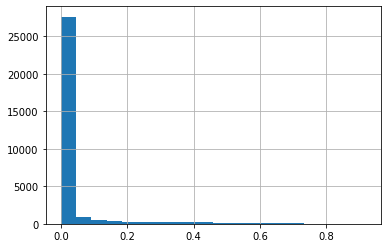

In [51]:
phil_corpus.items['Topic 93'].hist(bins=20)

In [52]:
phil_corpus.items[phil_corpus.items['Topic 93'] >0.4]

,Title,Text,Newspaper,Date,Tokenised,BOW,Topic 90,Topic 93
LT_18940217_ARTICLE18,UNTITLED,[A communication from the honorary secretary o...,LT,18940217,"[communication, honorary, secretary, scripture...","[(10, 1), (20, 1), (95, 2), (131, 1), (136, 1)...",0.0,0.549668
LT_18940720_ARTICLE48,SCRIPTURE TEXT BOOK FOR PUBLIC SCHOOLS.,[A meeting for the advocacy of the “ text book...,LT,18940720,"[meeting, advocacy, text, book, movement, held...","[(88, 1), (95, 1), (104, 1), (146, 1), (161, 1...",0.0,0.655802
LT_18950205_ARTICLE15,STATE EDUCATION.,"[TO THE EDITOR. . Sib, —The Rev Father Lynch m...",LT,18950205,"[editor, sib, rev, father, lynch, must, either...","[(95, 1), (137, 1), (155, 1), (189, 1), (232, ...",0.0,0.434359
LT_18950205_ARTICLE30,The Lyttelton Times. TUESDAY. FEBRUARY 5. 1895...,"[“He who opens a school,” said Victor Hugo, “ ...",LT,18950205,"[opens, school, said, victor, hugo, closes, pr...","[(31, 1), (35, 1), (37, 1), (67, 1), (68, 1), ...",0.0,0.445872
LT_18950503_ARTICLE31,PRIMARY EDUCATION.,"[The Church Neivs, winch told us last moatb th...",LT,18950503,"[church, neivs, winch, told, last, moatb, chil...","[(10, 1), (74, 1), (79, 2), (89, 1), (104, 1),...",0.0,0.468168
...,...,...,...,...,...,...,...,...
ODT_18740103_ARTICLE13,AMERICA'S TESTIMONY TO SECULAB EDUCATION.,"[Mr Macrae's ''Americans at Home,"" pub lished ...",ODT,18740103,"[macrae's, americans, home, pub, lished, 1870,...","[(9, 1), (19, 1), (37, 2), (40, 1), (73, 1), (...",0.0,0.656762
ODT_18771108_ARTICLE8,The Otago Daily Times. WITH WHICH IS INCORPORA...,[It wis not to be expected that the ad voentps...,ODT,18771108,"[wis, expected, voentps, religion, schools, ve...","[(40, 1), (79, 1), (146, 1), (149, 1), (189, 1...",0.0,0.628638
ODT_18790120_ARTICLE11,THE BIBLE IN SCHOOLS.,[The Rev. Dr Roseby presched en this sub j set...,ODT,18790120,"[rev, roseby, presched, set, last, evening, th...","[(16, 2), (31, 1), (37, 2), (42, 1), (50, 1), ...",0.0,0.501316
ODT_18790120_ARTICLE17,THE EARLY SETTLERS AND THE BIBLE. TO THE EDITOR.,"[Sir, —I was gratified to read in your leading...",ODT,18790120,"[sir, gratified, read, leading, article, riot,...","[(16, 1), (31, 2), (58, 1), (73, 1), (104, 3),...",0.0,0.481281


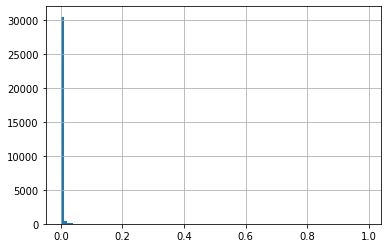

In [56]:
phil_corpus.items['Topic 90'].hist(bins=100)

In [57]:
phil_corpus.items[phil_corpus.items['Topic 90'] >0.1]

,Title,Text,Newspaper,Date,Tokenised,BOW,Topic 90,Topic 93
LT_18950130_ARTICLE24,"The Lyttelton Times. WEDNESDAY, JANUARY 30. 18...",[It is a hopeful sign to find a rigidly Conser...,LT,18950130,"[hopeful, sign, find, rigidly, conservative, j...","[(5, 1), (31, 1), (60, 1), (73, 1), (74, 1), (...",0.226296,0.000000
LT_18950628_ARTICLE54,THE GOVERNOR’S SPEECH.,"[| TO THE EDITOR. ij Sir, —It was my intaatioa...",LT,18950628,"[editor, sir, intaatioa, write, lines, calling...","[(8, 1), (57, 1), (67, 1), (88, 1), (121, 1), ...",0.239853,0.000000
LT_18980725_ARTICLE59,MENTAL HEALING.,"[TO THE® EDITOR. , Sir,-i-I.have no wish to cr...",LT,18980725,"[editor, sir, wish, cross, swords, corresponde...","[(10, 2), (31, 1), (37, 1), (55, 1), (130, 1),...",0.114531,0.000000
WH_18970605_ARTICLE30,CHURCHES AND GREEDS.,"[Where is Wansen's God ?, The most eloquent of...",WH,18970605,"[wansen's, god, eloquent, fche, london, strict...","[(10, 1), (31, 2), (33, 1), (57, 1), (88, 1), ...",0.207029,0.000000
NEM_18890302_ARTICLE15,"""EXTENT OF TH DELUGE ""","[To THE EDITOK OF THK ""EVENING MAIL.'g Sir,— M...",NEM,18890302,"[editok, thk, evening, mail, sir, may, allowed...","[(22, 3), (37, 1), (50, 1), (51, 1), (60, 1), ...",0.192373,0.000000
NEM_18970111_ARTICLE7,"Nelson Evening Mail. MONDAY, JANUARY 11 1897.",[The increasing activity of Germany as a comme...,NEM,18970111,"[increasing, activity, germany, commercial, ri...","[(31, 2), (61, 2), (65, 1), (73, 2), (74, 1), ...",0.183922,0.000000
NZTIM_18890924_ARTICLE10,THE MILITARY VIEW OF POLITICS.,[An outcry has been lately-raised by a certain...,NZTIM,18890924,"[outcry, lately, raised, certain, class, polit...","[(8, 1), (10, 1), (60, 1), (68, 1), (74, 2), (...",0.120959,0.000000
LT_18860123_ARTICLE33,REVIEWS.,[• OUE HGESES.* ; Mr Alfred Saunders' has alre...,LT,18860123,"[oue, hgeses, alfred, saunders, already, pub, ...","[(9, 6), (16, 1), (35, 1), (37, 4), (40, 2), (...",0.144057,0.000000
LT_18860928_ARTICLE41,LITERATURE FOR WORKING MEN.,"["" NINETBBNTH CBNTUBY."" In the shape of books ...",LT,18860928,"[ninetbbnth, cbntuby, shape, books, working, c...","[(37, 2), (60, 1), (69, 1), (74, 1), (93, 1), ...",0.189637,0.000000
LT_18880405_ARTICLE20,LATIN AND GREEK.,[[Edward A. Freeman.] If I believed that Greek...,LT,18880405,"[edward, freeman, believed, greek, latin, dead...","[(58, 2), (73, 1), (75, 2), (76, 2), (77, 2), ...",0.119925,0.000000


## Topic 93 Examination

How widespread is it?

In [11]:
topic_93_df = phil_corpus.items[phil_corpus.items['Topic 93'] >0.4]
with open('dictionaries/codes2names.pickle', 'rb') as fin:
    codes2names = pickle.load(fin)
for (i, count) in topic_93_df['Newspaper'].value_counts().iteritems():
    print(f'{codes2names[i]}: {count}')

Otago Daily Times: 132
Evening Star: 123
Lyttelton Times: 68
Press: 42
Auckland Star: 38
Bruce Herald: 34
Daily Southern Cross: 31
Otago Witness: 30
New Zealand Times: 27
Nelson Evening Mail: 26
Wanganui Chronicle: 22
Hawke's Bay Herald: 21
Ashburton Guardian: 17
Oamaru Mail: 17
Wanganui Herald: 16
Marlborough Express: 15
Colonist: 14
Wellington Independent: 11
West Coast Times: 9
Manawatu Times: 8
Daily Telegraph: 8
Feilding Star: 7
Mount Ida Chronicle: 7
North Otago Times: 6
Mataura Ensign: 6
Wairarapa Standard: 6
Waikato Times: 5
Manawatu Herald: 5
Lake Wakatip Mail: 5
Grey River Argus: 5
Manawatu Standard: 4
Wairarapa Daily Times: 4
Western Star: 4
Westport Times: 3
Dunstan Times: 3
Hawera & Normanby Star: 3
Hawke's Bay Times: 2
Lake County Press: 2
Northern Advocate: 1
Clutha Leader: 1
Kumara Times: 1
Cromwell Argus: 1
Bush Advocate: 1


Both the Otago Daily Times and the Evening Star are Dunedin newspapers. A massive majority thus comes from Dunedin. We also see quite a good showing for the Press.

But is it different from overall distribution of the NB2 corpus?

In [67]:
for (i, count) in phil_corpus.items['Newspaper'].value_counts().iteritems():
    print(f'{codes2names[i]}: {count}')

Otago Daily Times: 2867
Evening Star: 2733
Otago Witness: 2699
Auckland Star: 2231
Lyttelton Times: 2173
Press: 1881
Bruce Herald: 1594
New Zealand Times: 1391
Colonist: 986
Nelson Evening Mail: 849
Hawke's Bay Herald: 831
Daily Southern Cross: 763
Oamaru Mail: 710
North Otago Times: 661
Marlborough Express: 583
Wanganui Herald: 570
Western Star: 549
Wanganui Chronicle: 545
Daily Telegraph: 527
Waikato Times: 521
Lake Wakatip Mail: 512
Cromwell Argus: 455
West Coast Times: 436
Mataura Ensign: 386
Grey River Argus: 385
Ashburton Guardian: 361
Wellington Independent: 289
Wairarapa Daily Times: 248
Mount Ida Chronicle: 230
Feilding Star: 209
Dunstan Times: 162
Inangahua Times: 155
Oxford Observer: 149
Wairarapa Standard: 139
Westport Times: 138
Lake County Press: 135
Bush Advocate: 124
Hawke's Bay Times: 123
Clutha Leader: 112
Hawera & Normanby Star: 102
Manawatu Herald: 96
Manawatu Standard: 92
Manawatu Times: 75
Woodville Examiner: 74
Northern Advocate: 58
Kumara Times: 52
Hastings Stan

Not particularly.

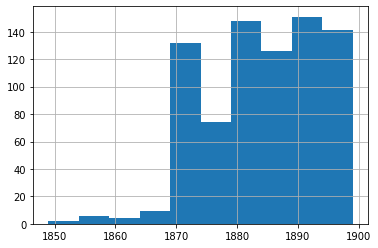

In [77]:
# Counts by year.
topic_93_df.index.map(lambda x: int(x[x.find('_')+1:x.find('_')+5])).to_series().hist()

A word cloud might again be useful here:

In [71]:
dtm = corpus2csc(topic_93_df['BOW'], num_terms=len(dictionary))
dtm = pd.DataFrame.sparse.from_spmatrix(dtm)
dtm.index = dictionary.values()

# Sum accross columns to get corpus word counts.
word_counts = dtm.sum(axis=1)

In [73]:
word_counts = word_counts.to_dict()
wordcloud_image = wordcloud.WordCloud(
    mode='RGBA',
    background_color=None,
    width=1000,
    height=500)
wordcloud_image = wordcloud_image.generate_from_frequencies(word_counts)
wordcloud_image.to_file(f'wordclouds/edu_bow.png')

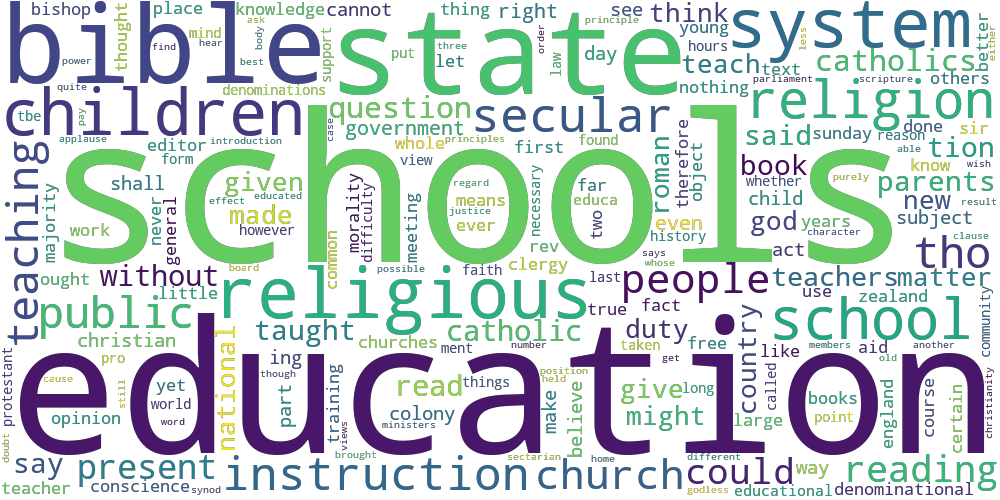

In [75]:
wordcloud_image.to_image()

In [12]:
search_indices = NL_helpers.search_text(topic_93_df, 'zealand', lower=True)
interact(NL_helpers.html_text, index=search_indices, dataframe=fixed(topic_93_df), boldface=fixed('Zealand'))

interactive(children=(Dropdown(description='index', options=('NZTIM_18870507_ARTICLE31', 'AS_18931108_ARTICLE2…

<function NL_helpers.html_text(index, dataframe, boldface=None)>

Much discussion of https://en.wikipedia.org/wiki/Education_Act_1877